In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For ascii plot - can be fetched from pip
import termiplot as tp



In [49]:
ages = [i for i in range(20)]

# Calculate age distribution at steady state

In [50]:
def calc_steadystate_vehicle_age_distributions(ages, average_expectancy=10, standard_dev=3):
    """ A simple normal cummulative distribution funtion
    
    Calculates an age distribution function that would be consistent with
    1) A normal distribution around an average age of death
    2) A steady state situation, where the deaths in each year are replaced by new cars

    
    
    
    
    Parameters
    ----------
    ages : 1-dimensional numpy array
        The range of ages that we are investigating
    average_expectancy : float
        Average age at which a typical car dies
    standard_deviation: float
        Standar deviation around that average death age
        
    Returns
    -------
    q : The fraction
    
    Example
    -------

      Average age of death (loc): 10,  Standard Deviation: 3

      Age Distribution at Steady State

       10 +----------------------------------------------------------------------+
         |*************                                                         |
         |             *******                                                  |
       9 |                    ***                                               |
         |                       *                                              |
       8 |                        ***                                           |
         |                                                                      |
         |                           **                                         |
       7 |                             **                                       |
         |                                                                      |
       6 |                               *                                      |
         |                                *                                     |
         |                                 *                                    |
       5 |                                  *                                   |
         |                                   *                                  |
         |                                    *                                 |
       4 |                                     *                                |
         |                                      **                              |
       3 |                                        **                            |
         |                                                                      |
         |                                          ***                         |
       2 |                                                                      |
         |                                             ***                      |
       1 |                                                *                     |
         |                                                 ***                  |
         |                                                    *******           |
       0 +----------------------------------------------------------------------+
         0      2      4      6      8       10     12     14     16     18     20


    
    """
    
    h = 1 - norm.cdf(ages, loc=average_expectancy, scale=standard_dev)
    q = h / h.sum()
    return q



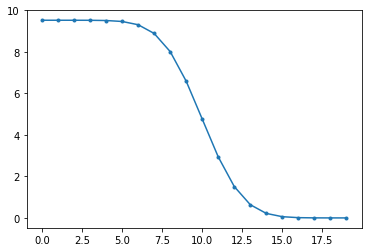

In [51]:
q = calc_steadystate_vehicle_age_distributions(ages, 10, 2)
plt.plot(ages, q * 100, marker='.')

In [52]:
fig = tp.figure()
fig.plot(ages, q*100, height=30)
fig.show()

  10 +----------------------------------------------------------------------+
     |********************                                                  |
     |                    ****                                              |
   9 |                        ***                                           |
     |                                                                      |
   8 |                           *                                          |
     |                            *                                         |
     |                             *                                        |
   7 |                              *                                       |
     |                               *                                      |
   6 |                                *                                     |
     |                                 *                                    |
     |                                 *                        

# Memento mori

In [53]:
def calculate_probability_of_vehicle_retirement(ages, age_distribution):
    """ Calculate probability of any given car dying during the year, depending on its age.
    This probability is calculated from the age distribution of a population, that is assumed to be and to have been at steady state

    This is only valid if we can assume that the population is at steady state. 
    If in doubt, it is probably best to rely on some idealized population distribution, 
    such as the one calculated by `calc_steadystate_vehicle_age_distributions()`  
        
    Parameters
    ----------
    ages : 1-dimensional numpy array
        The range of ages that we are investigating
        
    age_distribution: 1-dimensional numpy array
        The fraction of vehicles that have a certain age
    
    
    Returns
    -------
    g : 1-dimensional numpy array
        The probability that a car of a given age will die during the year
        
    Example
    --------
    
    Given an age distribution consistent with an average life expectancy of 10 years (SD 3 years), we get the following
    
           Probability of death during the year, as function of age
    
        1 +---------------------------------------------------------------------+
          |                                                                  *  |
          |                                                                 *   |
      0.9 |                                                                 *   |
          |                                                                *    |
      0.8 |                                                                *    |
          |                                                               *     |
          |                                                               *     |
      0.7 |                                                              *      |
          |                                                             **      |
      0.6 |                                                         ****        |
          |                                                      ***            |
          |                                                   ***               |
      0.5 |                                                 **                  |
          |                                               **                    |
          |                                           ****                      |
      0.4 |                                         **                          |
          |                                       **                            |
      0.3 |                                    ***                              |
          |                                  **                                 |
          |                                **                                   |
      0.2 |                             ***                                     |
          |                          ***                                        |
      0.1 |                      ****                                           |
          |                   ***                                               |
          |            *******                                                  |
        0 +---------------------------------------------------------------------+
      0      2      4      6      8      10     12     14     16     18     20
                                    age of car
    
    """
    # Initialize
    g = np.zeros_like(q)
    
    
    for a in ages[:-1]:
        if q[a] > 0:
            # Probability of dying is 1 minus the factions of cars that make it to the next year
            g[a] = 1 - q[a + 1] / q[a]
            
        else:
            # If no car left, then 100% death (just to avoid NaN)
            g[a] = 1.0
            
    # At the end of the time window, force exactly 100% probability of death
    g[-1] = 1.0
    
    return g#ages = age

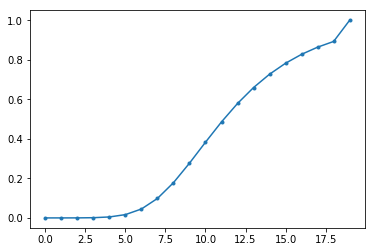

In [54]:
g = calculate_probability_of_vehicle_retirement(ages, q)

plt.plot(age, g, marker='.')

In [55]:
fig = tp.figure()
fig.plot(ages, g, height=30)
fig.show()

    1 +---------------------------------------------------------------------+
      |                                                                **   |
      |                                                               *     |
  0.9 |                                                             **      |
      |                                                       ******        |
  0.8 |                                                     **              |
      |                                                  ***                |
      |                                                **                   |
  0.7 |                                              **                     |
      |                                            **                       |
  0.6 |                                          **                         |
      |                                         *                           |
      |                                       **                

# Quality checks

In [36]:
# Quality check: Age distribution should add up to 1
np.allclose(q.sum(), 1)

True

In [57]:
# The sum of all the cars that are retired must the number of cars added in the first year: steady state

M = 1000 # Total number of cars

retired = g.dot(q * M)

added = q[0] * M

np.allclose(retired, added)

True